In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

**Importing the dataset**

In [59]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [60]:
x= data[["Age","EstimatedSalary"]]
y= data["Purchased"]
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 0)
print(x_train)

print(y_test)

     Age  EstimatedSalary
336   58           144000
64    59            83000
55    24            55000
106   26            35000
300   58            38000
..   ...              ...
323   48            30000
192   29            43000
117   36            52000
47    27            54000
172   26           118000

[320 rows x 2 columns]
132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64


**Feature Scaling**

In [61]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

**Fitting Decision Tree Classification to the Training set**

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve,confusion_matrix

In [63]:
from sklearn.model_selection import cross_val_score
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(x_train, y_train)
  trainAccuracy = accuracy_score(y_train, dt.predict(x_train))
  valAccuracy = cross_val_score(dt, x, y, cv=10)
  print(depth, trainAccuracy, np.mean(valAccuracy))

1 0.815625 0.825
2 0.909375 0.8949999999999999
3 0.9125 0.85
4 0.925 0.8724999999999999
5 0.9375 0.8750000000000002
6 0.95 0.8625
7 0.9625 0.8550000000000001
8 0.975 0.8425
9 0.98125 0.8424999999999999
10 0.984375 0.8450000000000001
20 0.996875 0.8375
40 0.996875 0.8350000000000002
60 0.996875 0.835


In [21]:
df = DecisionTreeClassifier(max_depth=2)
df.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

**Predicting the Test set results**

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]
accuracy_score =  0.95
roc_auc_score = 0.95141065830721


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


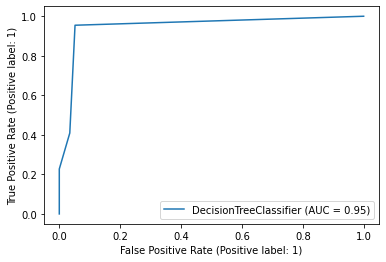

In [22]:
y_pred = df.predict(x_test)
print(y_pred)
acc = accuracy_score(y_test, y_pred)
print("accuracy_score = ",acc)
acc = roc_auc_score(y_test, y_pred)
print("roc_auc_score =",acc)
plot_roc_curve(df, x_test, y_test)

[Text(167.4, 181.2, 'X[0] <= 0.611\ngini = 0.47\nsamples = 320\nvalue = [199, 121]'),
 Text(83.7, 108.72, 'X[1] <= 0.596\ngini = 0.311\nsamples = 228\nvalue = [184, 44]'),
 Text(41.85, 36.23999999999998, 'gini = 0.082\nsamples = 186\nvalue = [178, 8]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.245\nsamples = 42\nvalue = [6, 36]'),
 Text(251.10000000000002, 108.72, 'X[1] <= -0.824\ngini = 0.273\nsamples = 92\nvalue = [15, 77]'),
 Text(209.25, 36.23999999999998, 'gini = 0.059\nsamples = 33\nvalue = [1, 32]'),
 Text(292.95, 36.23999999999998, 'gini = 0.362\nsamples = 59\nvalue = [14, 45]')]

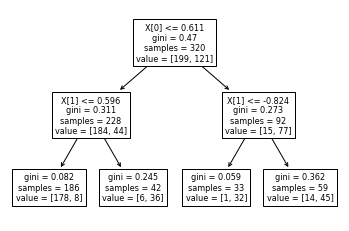

In [23]:
from sklearn import tree
tree.plot_tree(df)

**Making the Confusion Matrix**

In [28]:
confusion_matrix(y_test,y_pred)

array([[55,  3],
       [ 1, 21]])

**Visualising the Training set results**

Text(0, 0.5, 'y_train')

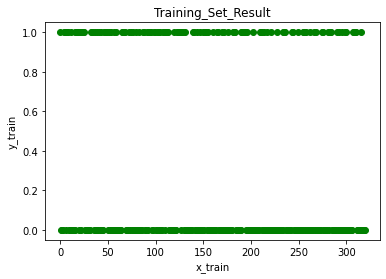

In [40]:
x_train=np.arange(0,len(x_train),1)
plt.scatter(x= x_train, y=y_train,c='g')
plt.title("Training_Set_Result")
plt.xlabel("x_train")
plt.ylabel("y_train")

**Visualising the Test set results**

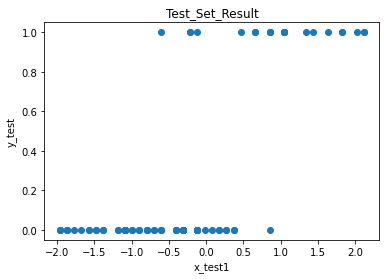

In [64]:
plt.scatter(x_test[:,0], y_test)
plt.title('Test_Set_Result')
plt.xlabel('x_test1')
plt.ylabel('y_test')
plt.show()

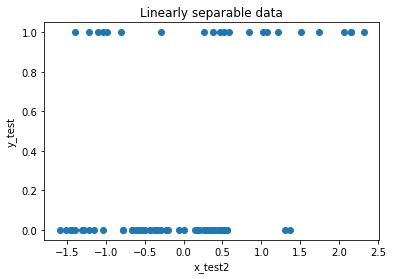

In [66]:
plt.scatter(x_test[:,1], y_test)
plt.title('Linearly separable data')
plt.xlabel('x_test2')
plt.ylabel('y_test')
plt.show()